In [2]:
#
# http://pandas.pydata.org/pandas-docs/stable/visualization.html
# http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
#    
import urllib
import requests
import json
import io
from pandas.io.json import json_normalize
import pandas as pd #this is how I usually import pandas
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

dataAPIURL = "https://quantumconfigurations.com/dionysus/data_api.php?%s"
%matplotlib inline

In [3]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.4.2 (default, Oct 19 2014, 13:31:11) 
[GCC 4.9.1]
Pandas version 0.18.1
Matplotlib version 1.5.1


In [12]:
params = urllib.parse.urlencode(
    {
        'op': 'GET_ORDER_BOOK',
        'start_dt': '2016-07-29 00:00:00',
        'end_dt': '2016-07-29 01:00:00'
    }
)
#params = b'start_dt=2016-07-28&end_dt=2016-07-29'

In [13]:
response = requests.get(dataAPIURL % params,
                        auth=requests.auth.HTTPBasicAuth(
                          'mosias',
                          'mosias98'))

#print(response.text)

In [14]:
orderbook = pd.read_csv(io.StringIO(response.text))

In [15]:
plt.style.available

['seaborn-white',
 'ggplot',
 'seaborn-notebook',
 'dark_background',
 'classic',
 'seaborn-muted',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'grayscale',
 'seaborn-deep',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'bmh',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-bright']

In [16]:
matplotlib.style.use('dark_background')

In [17]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [18]:
orderbook.columns.values.tolist()

['bid', 'ask', 'updated']

Current size: [15.0, 6.0]


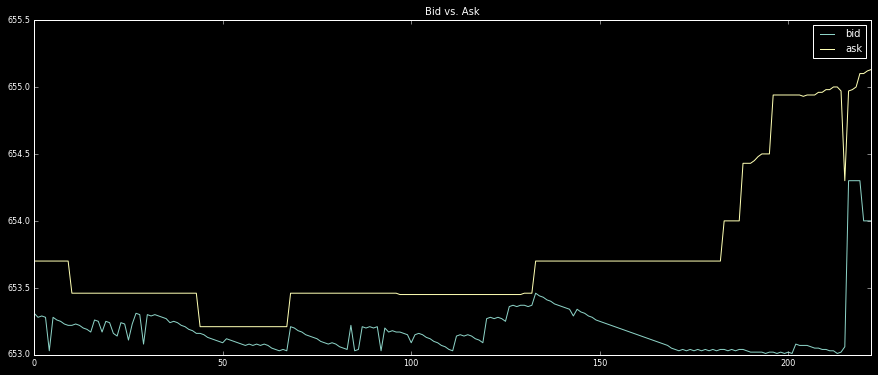

In [19]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size: %s" % fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

orderPLot = orderbook.plot(kind='line', title='Bid vs. Ask', linewidth=1)